In [ ]:
import spacy

In [2]:
from gloria.datasets.visualization_utils import *
import pandas as pd
import os
import skimage
from torch import nn
import seaborn as sns
import shutil

### Get Results Paths

In [3]:
paths = {
    'uniter_none': '/scratch/mcinerney.de/uniter_data/imagenome/normal_output_test/',
    'uniter_swapleftright': '/scratch/mcinerney.de/uniter_data/imagenome/swapleftright_output_test/',
    'uniter_shufflebboxes': '/scratch/mcinerney.de/uniter_data/imagenome/shufflebboxes_output_test/',
    'uniter_randsent': '/scratch/mcinerney.de/uniter_data/imagenome/randsent_output_test/',
    'uniter_randbboxes': '/scratch/mcinerney.de/uniter_data/imagenome/randbboxes_output_test/',
    'uniter_gensent': '/scratch/mcinerney.de/uniter_data/imagenome/gensent_output_test/',
    'uniter_gensentswapcond': '/scratch/mcinerney.de/uniter_data/imagenome/gensentswapcond_output_test/',

    'original_none': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_02_23_23_29/test_outputs_0/',
#     'original_swapleftright': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_12_52_24/test_outputs_0/',
    'original_swapleftright': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_07_18_41_32/test_outputs_0/',
    'original_shufflebboxes': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_13_12_05/test_outputs_0/',
    'original_randsent': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_14_16_30/test_outputs_0/',
    'original_randbboxes': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_13_41_11/test_outputs_0/',
    'original_gensent': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_14_49_57/test_outputs_0/',
    'original_gensentswapcond': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_15_07_16/test_outputs_0/',

    'retrained_none': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_02_23_24_55/test_outputs_0/',
#     'retrained_swapleftright': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_13_03_09/test_outputs_0/',
    'retrained_swapleftright': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_07_18_59_18/test_outputs_0/',
    'retrained_shufflebboxes': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_13_19_08/test_outputs_0/',
    'retrained_randsent': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_14_18_51/test_outputs_0/',
    'retrained_randbboxes': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_13_42_36/test_outputs_0/',
    'retrained_gensent': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_14_50_47/test_outputs_0/',
    'retrained_gensentswapcond': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_16_22_34/test_outputs_0/',

    'retrainedabnormal_none': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_02_23_26_17/test_outputs_0/',
#     'retrainedabnormal_swapleftright': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_13_04_10/test_outputs_0/',
    'retrainedabnormal_swapleftright': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_07_20_46_44/test_outputs_0/',
    'retrainedabnormal_shufflebboxes': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_13_20_11/test_outputs_0/',
    'retrainedabnormal_randsent': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_14_20_19/test_outputs_0/',
    'retrainedabnormal_randbboxes': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_13_43_34/test_outputs_0/',
    'retrainedabnormal_gensent': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_14_51_42/test_outputs_0/',
    'retrainedabnormal_gensentswapcond': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_15_09_56/test_outputs_0/',

#     epoch 16
#     'retrainedmasked_none': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_22_42_58/test_outputs_0/',
#     'retrainedmasked_swapleftright': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_22_47_44/test_outputs_0/',
#     'retrainedmasked_shufflebboxes': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_22_51_04/test_outputs_0/',
#     'retrainedmasked_randsent': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_23_52_18/test_outputs_0/',
#     'retrainedmasked_randbboxes': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_22_51_57/test_outputs_0/',
#     'retrainedmasked_gensent': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_23_53_01/test_outputs_0/',
#     'retrainedmasked_gensentswapcond': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_04_00_55_31/test_outputs_0/',

#     epoch 25
    'retrainedmasked_none': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_04_10_09_01/test_outputs_0/',
#     'retrainedmasked_swapleftright': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_04_10_10_17/test_outputs_0/',
    'retrainedmasked_swapleftright': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_08_00_17_49/test_outputs_0/',
    'retrainedmasked_shufflebboxes': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_04_10_10_57/test_outputs_0/',
    'retrainedmasked_randsent': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_04_10_13_31/test_outputs_0/',
    'retrainedmasked_randbboxes': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_04_10_12_40/test_outputs_0/',
    'retrainedmasked_gensent': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_04_10_14_46/test_outputs_0/',
    'retrainedmasked_gensentswapcond': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_04_10_15_27/test_outputs_0/',

    'retrainedrandsent_none': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_02_23_27_17/test_outputs_0/',
#     'retrainedrandsent_swapleftright': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_13_08_23/test_outputs_0/',
    'retrainedrandsent_swapleftright': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_08_10_43_08/test_outputs_0/',
    'retrainedrandsent_shufflebboxes': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_13_22_14/test_outputs_0/',
    'retrainedrandsent_randsent': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_14_45_27/test_outputs_0/',
    'retrainedrandsent_randbboxes': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_13_44_43/test_outputs_0/',
    'retrainedrandsent_gensent': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_14_58_31/test_outputs_0/',
    'retrainedrandsent_gensentswapcond': '/scratch/mcinerney.de/gloria_outputs6/output/gloria_pretrain_1.0/2022_01_03_15_12_23/test_outputs_0/',
}


In [4]:
dfs = {k: pd.read_csv(os.path.join(path, 'sentences.csv')) for k, path in paths.items()}

### Postprocess Dataframes

#### Get mean report bboxes iou for creating most diverse report bboxes subset

In [5]:
def get_mean_report_ious(df):
    mean_ious = []
    image_shape = (224, 224)
    report_to_mean_iou = {}
    for i, row in tqdm(df.iterrows(), total=len(df)):
        if row.dicom_id in report_to_mean_iou.keys():
            mean_report_iou = report_to_mean_iou[row.dicom_id]
        else:
            report_rows = df[df.dicom_id == row.dicom_id]
            if len(report_rows) > 1:
                report_ious = []
                for a in range(len(report_rows) - 1):
                    row1 = report_rows.iloc[a]
                    label1 = sent_bboxes_to_segmentation_label(image_shape, eval(row1.bboxes))
                    for b in range(a + 1, len(report_rows)):
                        row2 = report_rows.iloc[b]
                        label2 = sent_bboxes_to_segmentation_label(image_shape, eval(row2.bboxes))
                        iou = ((label1 == 1) & (label2 == 1)).float().sum() / \
                              ((label1 == 1) | (label2 == 1)).float().sum()
                        report_ious.append(iou)
                mean_report_iou = sum(report_ious) / len(report_ious)
            else:
                mean_report_iou = None
            report_to_mean_iou[row.dicom_id] = mean_report_iou
        mean_ious.append(mean_report_iou)
    return mean_ious
dfs['original_none']['mean_report_ious'] = get_mean_report_ious(dfs['original_none'])

100%|██████████| 2496/2496 [00:10<00:00, 245.16it/s]


In [6]:
new_df = dfs['original_none'][~dfs['original_none'].auroc.isna() & ~dfs['original_none'].mean_report_ious.isna()]
threshold = new_df.sort_values('mean_report_ious')[:int(len(new_df) * .1)].mean_report_ious.max()
new_df = new_df[new_df.mean_report_ious <= threshold]
dicom_sent_id_set = set(new_df.dicom_sent_id.tolist())
most_diverse_report_bboxes_selector = lambda row: row.dicom_sent_id in dicom_sent_id_set

#### Get kl divergence with random sentence

In [7]:
def get_kl_divergence_with_random_sentence(df, path, path_random):
    kls = []
    for i, row in tqdm(df.iterrows(), total=len(df)):
        attn = torch.tensor(np.load(os.path.join(path, 'attn', row.dicom_sent_id + '.npy')))
        attn_random = torch.tensor(np.load(os.path.join(path_random, 'attn', row.dicom_sent_id + '.npy')))
        kl = ((attn_random * (torch.log(attn_random) - torch.log(attn))).sum() +
              (attn * (torch.log(attn) - torch.log(attn_random))).sum()) / 2
        kls.append(kl.item())
    return kls
for k in ['original', 'retrained', 'retrainedabnormal', 'retrainedmasked', 'retrainedrandsent', 'uniter']:
    dfs['%s_none' % k]['attn_kl_with_randsent'] = get_kl_divergence_with_random_sentence(
        dfs['%s_none' % k], paths['%s_none' % k], paths['%s_randsent' % k])


100%|██████████| 2507/2507 [00:11<00:00, 215.54it/s]


#### Add isabnormal

In [8]:
def get_isabnormal(df):
    abnormal_selector = RowLabelAndContextSelector(contains={('abnormal', 'yes')})
    return df.progress_apply(abnormal_selector, axis=1)


for k in ['original', 'retrained', 'retrainedabnormal', 'retrainedmasked', 'retrainedrandsent', 'uniter']:
    dfs['%s_none' % k]['isabnormal'] = get_isabnormal(dfs['%s_none' % k])

100%|██████████| 2507/2507 [00:00<00:00, 18717.04it/s]


### Plot Histograms

### Get Localization Scores

In [9]:
one_lung_selector = OrSelector(
             RowBBoxSelector(contains={'left lung'}, does_not_contain={'right lung'}),
             RowBBoxSelector(contains={'right lung'}, does_not_contain={'left lung'})
         )
abnormal_selector = RowLabelAndContextSelector(contains={('abnormal', 'yes')})
selectors = {'all': None, 'abnormal': abnormal_selector, 'one_lung': one_lung_selector,
             'most_diverse_report_bboxes': most_diverse_report_bboxes_selector}
example_df = dfs['original_none']
selector_counts = {name: len(example_df[example_df.apply(selector, axis=1)])
                   if selector is not None else len(example_df)
                   for name, selector in selectors.items()}
score_rows = []
ps = [.05, .1, .2, .3]
for k, df in dfs.items():
    score_rows.append({'model': k})
    for name, selector in selectors.items():
        rows = df[df.apply(selector, axis=1)] if selector is not None else df
        score_rows[-1]['%s_auroc' % name] = rows.auroc.mean()
        score_rows[-1]['%s_avg_precision' % name] = rows.avg_precision.mean()
        if 'attn_kl_with_randsent' in rows.keys():
            score_rows[-1]['%s_attn_kl_with_randsent' % name] = rows.attn_kl_with_randsent.mean()
        for p in ps:
            score_rows[-1]['%s_precision_at_%f' % (name, p)] = rows['precision_at_%f' % p].mean() \
                if 'precision_at_%f' % p in rows.keys() else None
            score_rows[-1]['%s_recall_at_%f' % (name, p)] = rows['recall_at_%f' % p].mean() \
                if 'recall_at_%f' % p in rows.keys() else None
            score_rows[-1]['%s_f1_at_%f' % (name, p)] = rows['f1_at_%f' % p].mean() \
                if 'f1_at_%f' % p in rows.keys() else None
            score_rows[-1]['%s_iou_at_%f' % (name, p)] = rows['iou_at_%f' % p].mean() \
                if 'iou_at_%f' % p in rows.keys() else None
    #     info = path_and_rows_to_info(path, rows=rows)
    #     plot_info(get_attn_overlay, info, path=path)
#     plt.close()
scores_df = pd.DataFrame(score_rows)
new_rows = []
for i, row in scores_df.iterrows():
    if row['model'].split('_')[1].startswith('gensent'):
        base_model = row['model'].split('_')[0] + '_gensent'
    else:
        base_model = row['model'].split('_')[0] + '_none'
    base_model_row = scores_df[scores_df.model == base_model].iloc[0]
    for name, selector in selectors.items():
        for k in (
                ['avg_precision', 'auroc'] +
                ['precision_at_%f' % p for p in ps] +
                ['iou_at_%f' % p for p in ps]):
            row['%s_%s_delta' % (name, k)] = row['%s_%s' % (name, k)] - base_model_row['%s_%s' % (name, k)]
    new_rows.append(row)
scores_df = pd.DataFrame(new_rows)
print('val counts', selector_counts)
scores_df

val counts {'all': 2496, 'abnormal': 748, 'one_lung': 285, 'most_diverse_report_bboxes': 252}


,model,all_auroc,all_avg_precision,all_attn_kl_with_randsent,all_precision_at_0.050000,all_recall_at_0.050000,all_f1_at_0.050000,all_iou_at_0.050000,all_precision_at_0.100000,all_recall_at_0.100000,...,most_diverse_report_bboxes_avg_precision_delta,most_diverse_report_bboxes_auroc_delta,most_diverse_report_bboxes_precision_at_0.050000_delta,most_diverse_report_bboxes_precision_at_0.100000_delta,most_diverse_report_bboxes_precision_at_0.200000_delta,most_diverse_report_bboxes_precision_at_0.300000_delta,most_diverse_report_bboxes_iou_at_0.050000_delta,most_diverse_report_bboxes_iou_at_0.100000_delta,most_diverse_report_bboxes_iou_at_0.200000_delta,most_diverse_report_bboxes_iou_at_0.300000_delta
0,uniter_none,0.849221,0.685733,0.037789,0.630800,0.271269,0.324656,0.025707,0.666557,0.409839,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,uniter_swapleftright,0.848435,0.686307,NaN,0.630292,0.275627,0.330181,0.025821,0.665622,0.408569,...,-0.001235,-0.003361,-0.018254,-0.022989,-0.008245,-0.007000,0.009177,-0.003980,0.005889,-0.006809
2,uniter_shufflebboxes,0.847025,0.679245,NaN,0.619747,0.268198,0.320914,0.026567,0.656247,0.403274,...,0.022391,0.006215,-0.008549,-0.010858,0.027929,0.031676,0.018331,-0.003433,0.007741,0.001002
3,uniter_randsent,0.845240,0.676891,NaN,0.613587,0.258786,0.312889,0.024851,0.653489,0.392285,...,-0.012952,-0.007405,-0.031729,-0.037467,-0.003838,-0.001820,0.002962,-0.005318,-0.012469,-0.004803
4,uniter_randbboxes,0.701941,0.492305,NaN,0.431189,0.202631,0.232485,0.013836,0.475180,0.311434,...,-0.085008,-0.122160,-0.102575,-0.074839,-0.021063,0.008082,-0.016025,-0.052656,-0.072909,-0.071775
5,uniter_gensent,0.848712,0.687982,NaN,0.631819,0.266777,0.321119,0.027072,0.665916,0.394758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,uniter_gensentswapcond,0.851603,0.691239,NaN,0.643049,0.268922,0.327306,0.027029,0.666067,0.387668,...,0.011539,0.015222,0.008226,0.019047,0.022439,0.021044,0.003790,-0.008884,0.003144,-0.001074
7,original_none,0.690680,0.516796,0.079880,0.585815,0.302472,0.324086,0.037916,0.591963,0.398236,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,original_swapleftright,0.689916,0.516379,NaN,0.584404,0.299492,0.321829,0.038178,0.590834,0.394400,...,-0.001795,-0.003058,-0.001914,-0.004740,-0.001146,-0.002712,0.001004,0.000115,-0.001964,-0.004796
9,original_shufflebboxes,0.687042,0.513040,NaN,0.581308,0.298878,0.325088,0.037352,0.586298,0.391239,...,-0.007696,-0.004313,-0.010249,-0.007558,-0.008609,-0.004039,-0.000559,-0.005189,-0.002093,-0.013445


### Get Latex tables for Localization Scores

In [20]:
def get_latex_table_localization_scores(prefixes, scores_df, deltas=True, metrics=['auroc', 'avg_precision', 'precision', 'iou']):
    latex_table = ''
    model_names = {'original': 'GLoRIA', 'retrained': 'Retrained',
                   'retrainedabnormal': 'Retrained w/ Abnormal',
                   'retrainedmasked': 'Retrained w/ Masking',
                   'retrainedrandsent': 'Retrained w/ Rand Sents',
                   'uniter': 'UNITER'}
    augmentation_names = {'none': 'Base', 'randsent': 'Random Sentences',
                          'shufflebboxes': 'Shuffle Bboxes', 'randbboxes': 'Random Bboxes',
                          'swapleftright': 'Swap Left Right',
                          'gensent': 'Synthetic Sentences',
                          'gensentswapcond': 'Synth w/ Swapped Conditions'}
    for i, row in scores_df.iterrows():
        formatted_row_scores = []
        augmentation = augmentation_names[row.model.split('_')[-1]]
        if not deltas and not (augmentation == 'Base' or augmentation == 'Synthetic Sentences'):
            continue
        for name in prefixes:
            if augmentation == 'Base' or augmentation == 'Synthetic Sentences':
                if 'auroc' in metrics:
                    formatted_row_scores.append(row['%s_auroc' % name])
                if 'avg_precision' in metrics:
                    formatted_row_scores.append(row['%s_avg_precision' % name])
                if 'precision' in metrics:
                    formatted_row_scores.append(
                        '%.2f/%.2f/%.2f' % tuple(row['%s_precision_at_%f' % (name, p)] * 100 for p in [.05, .1, .3]))
                if 'iou' in metrics:
                    formatted_row_scores.append(
                        '%.2f/%.2f/%.2f' % tuple(row['%s_iou_at_%f' % (name, p)] * 100 for p in [.05, .1, .3]))
            else:
                if 'auroc' in metrics:
                    formatted_row_scores.append(
                        ('+' if row['%s_auroc_delta' % name] > 0 else '-') +
                        '%.2f' % abs(row['%s_auroc_delta' % name] * 100))
                if 'avg_precision' in metrics:
                    formatted_row_scores.append(
                        ('+' if row['%s_avg_precision_delta' % name] > 0 else '-') +
                        '%.2f' % abs(row['%s_avg_precision_delta' % name] * 100))
                if 'precision' in metrics:
                    formatted_row_scores.append(
                        '%s/%s/%s' %
                        tuple(
                            ('+' if row['%s_precision_at_%f_delta' % (name, p)] > 0 else '-') +
                            ('%.2f' % abs(row['%s_precision_at_%f_delta' % (name, p)] * 100))
                            for p in [.05, .1, .3])
                    )
                if 'iou' in metrics:
                    formatted_row_scores.append(
                        '%s/%s/%s' %
                        tuple(
                            ('+' if row['%s_iou_at_%f_delta' % (name, p)] > 0 else '-') +
                            ('%.2f' % abs(row['%s_iou_at_%f_delta' % (name, p)] * 100))
                            for p in [.05, .1, .3])
                    )
        if augmentation == 'Synthetic Sentences':
            latex_table += '\cline{2-6}\n'
        if augmentation == 'Base':
            latex_table += '\hline\n'
            model = model_names['_'.join(row.model.split('_')[:-1])]
            model = '\multirow{' + ('7' if deltas else '2') + '}{*}{' + model + '}'
        else:
            model = ''
        formatted_row_scores = '%s & %s & ' % (model, augmentation) + ' & '.join(
            ['%.2f' % (s * 100) if isinstance(s, float) else str(s) for s in formatted_row_scores])
        latex_table += formatted_row_scores + ' \\\\\n'
    print(latex_table)

# print('all')
# get_latex_table_localization_scores(['all'], scores_df)
# print('one_lung')
# get_latex_table_localization_scores(['one_lung'], scores_df, deltas=False)
# print('abnormal')
# get_latex_table_localization_scores(['abnormal'], scores_df, deltas=False)
# print('most_diverse_report_bboxes')
# get_latex_table_localization_scores(['most_diverse_report_bboxes'], scores_df, deltas=False)
get_latex_table_localization_scores(['all', 'abnormal', 'one_lung', 'most_diverse_report_bboxes'], scores_df, deltas=False, metrics=['precision'])
get_latex_table_localization_scores(['all', 'abnormal', 'one_lung', 'most_diverse_report_bboxes'], scores_df, deltas=False, metrics=['iou'])


\hline
\multirow{2}{*}{UNITER} & Base & 63.08/66.66/63.82 & 60.16/63.33/58.51 & 47.73/47.62/45.97 & 50.83/52.21/46.34 \\
\cline{2-6}
 & Synthetic Sentences & 63.18/66.59/63.86 & 61.69/63.96/58.69 & 47.74/47.98/45.96 & 49.68/50.12/46.04 \\
\hline
\multirow{2}{*}{GLoRIA} & Base & 58.58/59.20/54.93 & 53.63/54.60/51.54 & 42.65/43.55/39.82 & 40.98/41.46/37.90 \\
\cline{2-6}
 & Synthetic Sentences & 58.88/59.19/55.23 & 57.28/57.06/50.95 & 50.87/48.12/38.80 & 42.77/43.30/38.39 \\
\hline
\multirow{2}{*}{Retrained} & Base & 46.54/41.07/39.78 & 46.53/37.20/35.20 & 35.86/29.05/28.03 & 38.89/30.61/27.73 \\
\cline{2-6}
 & Synthetic Sentences & 45.01/40.51/39.92 & 43.04/35.72/35.74 & 33.20/29.09/29.10 & 34.84/29.73/27.91 \\
\hline
\multirow{2}{*}{Retrained w/ Abnormal} & Base & 40.13/39.58/44.11 & 49.27/40.56/39.76 & 45.22/35.10/31.44 & 32.08/28.84/30.55 \\
\cline{2-6}
 & Synthetic Sentences & 35.78/35.19/43.24 & 42.34/33.56/38.29 & 39.90/29.20/29.73 & 28.52/25.73/29.96 \\
\hline
\multirow{2}{*}{Ret

### Entropy

In [12]:
model_names = {'original': 'GLoRIA', 'retrained': 'Retrained',
               'retrainedabnormal': 'Retrained w/ Abnormal',
               'retrainedmasked': 'Retrained w/ Masking',
               'retrainedrandsent': 'Retrained w/ Rand Sents',
               'uniter': 'UNITER'}
models = ['uniter_none', 'original_none', 'retrained_none', 'retrainedabnormal_none', 'retrainedmasked_none',
          'retrainedrandsent_none']
subset_names = {
    'all': 'All',
    'abnormal': 'Abnormal',
    'one_lung': 'One Lung',
    'most_diverse_report_bboxes': 'Most Diverse Report BBoxes'
}
ks = list(selectors.keys())
latex_entropy_table = 'Model & ' + ' & '.join([subset_names[k] for k in ks]) + '\\\\\n'
latex_entropy_table += '\hline\n'
for model in models:
    entropies = []
    for k in ks:
        selector = selectors[k]
        df = dfs[model]
        if selector is not None:
            df = df[df.apply(selector, axis=1)]
        entropies.append(df.attn_entropy.mean())
    latex_entropy_table += model_names[model.split('_')[0]] + ' & ' + ' & '.join(['%.3f' % e for e in entropies]) + '\\\\\n'
print(latex_entropy_table)


Model & All & Abnormal & One Lung & Most Diverse Report BBoxes\\
\hline
UNITER & 1.777 & 1.668 & 1.644 & 1.721\\
GLoRIA & 5.828 & 5.841 & 5.833 & 5.822\\
Retrained & 5.825 & 5.833 & 5.841 & 5.827\\
Retrained w/ Abnormal & 5.839 & 5.840 & 5.849 & 5.845\\
Retrained w/ Masking & 5.791 & 5.809 & 5.815 & 5.793\\
Retrained w/ Rand Sents & 5.889 & 5.889 & 5.889 & 5.889\\



### Plot Deltas

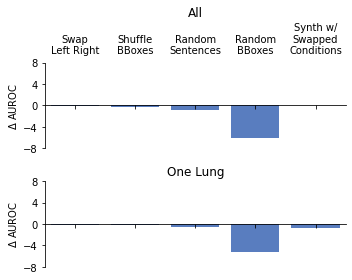

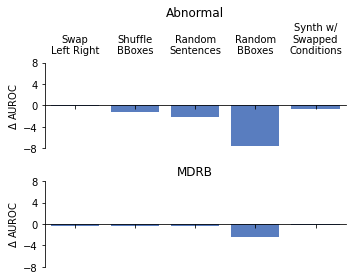

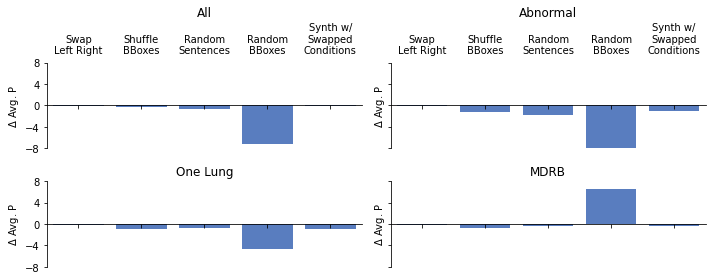

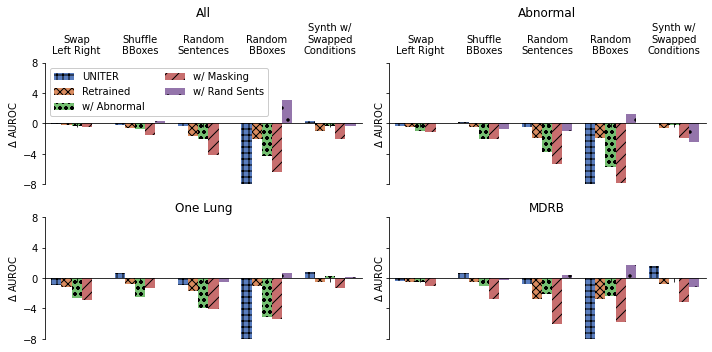

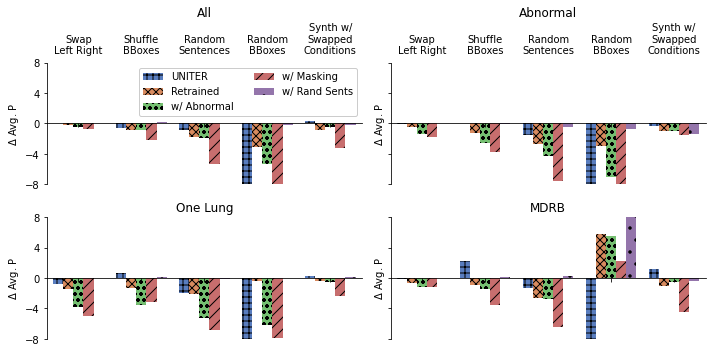

In [13]:
from matplotlib import rc
rc('text', usetex=False)
def get_delta_plots(scores_df, perturbations, subsets, models, shape=(1, 1), indices=(0), size=4,
                    figsize=None, bbox_to_anchor=None, metric='auroc'):
    model_names = {'original': 'GLoRIA', 'retrained': 'Retrained',
                   'retrainedabnormal': 'w/ Abnormal',
                   'retrainedmasked': 'w/ Masking',
                   'retrainedrandsent': 'w/ Rand Sents',
                   'uniter': 'UNITER'}
    perturbation_names = {'randsent': 'Random\nSentences',
                          'shufflebboxes': 'Shuffle\nBBoxes', 'randbboxes': 'Random\nBBoxes',
                          'swapleftright': 'Swap\nLeft Right',
                          'gensentswapcond': 'Synth w/\nSwapped\nConditions'}
    subset_names = {
        'all': 'All',
        'abnormal': 'Abnormal',
        'one_lung': 'One Lung',
        'most_diverse_report_bboxes': 'MDRB'
    }
    metric_names = {
        'auroc': 'AUROC',
        'avg_precision': 'Avg. P',
    }
    bar_width = 1 / (len(models) + 1)
#     tic_positions = [i + (bar_width * (len(models) - 1) / 2) for i in range(len(perturbations))]
    tic_positions = [i - bar_width for i in range(len(perturbations))]
    figsize = (size * len(subsets) * 1.05, size) if figsize is None else figsize
    fig, axs = plt.subplots(shape[0], shape[1], figsize=figsize, sharey=True, tight_layout=True, sharex=True)
    if shape[0] > 1 and shape[1] > 1:
#         remove_y_axis = [x > 0 for y, x in indices]
        remove_x_axis = [y < shape[0] - 1 for y, x in indices]
    elif shape[0] > 1:
#         remove_y_axis = [False for y in indices]
        remove_x_axis = [y < shape[0] - 1 for y in indices]
    elif shape[1] > 1:
#         remove_y_axis = [x > 0 for x in indices]
        remove_x_axis = [False for x in indices]
    remove_y_axis = [False] * len(indices)
    for a, subset in enumerate(subsets):
#         for b, model in enumerate(models):
#             positions = [i - .5 + (b * bar_width) for i in range(len(perturbations))]
#             ys = []
#             for p in perturbations:
#                 rows = scores_df[scores_df.model == (model + '_' + p)]
#                 ys.append(rows.iloc[0][subset + '_auroc_delta'] * 100)
#             axs[indices[a]].set_title(subset_names[subset])
#             axs[indices[a]].spines['bottom'].set_position('zero')
#             axs[indices[a]].spines['right'].set_color('none')
#             axs[indices[a]].spines['top'].set_color('none')
#             axs[indices[a]].bar(positions, ys, width=bar_width,
#                                 tick_label=[perturbation_names[p] for p in perturbations],
#                                 label=model_names[model])
#             axs[indices[a]].plot([-1, 4], [0, 0], '--', c='black')
#             axs[indices[a]].tick_params(axis="x", labeltop=True, labelbottom=False)
#             axs[indices[a]].set_xticks(tic_positions)
#             axs[indices[a]].set_xticklabels([perturbation_names[p] for p in perturbations])
#             if a == len(subsets) - 1 and len(models) > 1:
#                 axs[indices[a]].legend(bbox_to_anchor=bbox_to_anchor)
        df_rows = []
        for b, model in enumerate(models):
            for p in perturbations:
                rows = scores_df[scores_df.model == (model + '_' + p)]
                df_rows.append({'Model': model_names[model], 'Perturbation': perturbation_names[p],
                                '$\Delta$ ' + metric_names[metric]: rows.iloc[0][subset + '_' + metric + '_delta']
                                * 100,
                                'color': 'blue'})
        kwargs = dict(
            x='Perturbation', y='$\Delta$ ' + metric_names[metric],
            data=pd.DataFrame(df_rows), ax=axs[indices[a]],
            palette='muted', hue='Model',
        )
        axs[indices[a]].spines['bottom'].set_position('zero')
        axs[indices[a]].spines['right'].set_color('none')
        axs[indices[a]].spines['top'].set_color('none')
        axs[indices[a]].tick_params(axis="x", labeltop=remove_x_axis[a], labelbottom=False)
        axs[indices[a]].set_ylim([-8, 8])
        g = sns.barplot(**kwargs)
        axs[indices[a]].set_xlabel('')
        if remove_y_axis[a]:
            axs[indices[a]].set_ylabel('')
        if len(models) > 1:
            hatches = ['++', 'xxx', 'oo', '//', '.']
            for i,thisbar in enumerate(g.patches):
                thisbar.set_hatch(hatches[i // len(perturbations)])
        if a > 0 or len(models) == 1:
            g.legend([], [], frameon=False)
        else:
            g.legend(bbox_to_anchor=bbox_to_anchor, framealpha = 1.0, ncol=2).set_zorder(100)
        g.set_yticks(range(-8, 9, 4))
#         g.set_ylabel('$\Delta$ ' + metric_names[metric] + ' on ' + r"$\bf{" + subset_names[subset].replace(' ', '\;') + "}$")
#         g.set_title(r"$\bf{" + subset_names[subset].replace(' ', '\;') + "}$")
#         g.set_title(r"$" + subset_names[subset].replace(' ', '\;') + "$")
        g.set_title(subset_names[subset])

get_delta_plots(
    scores_df,
    ['swapleftright', 'shufflebboxes', 'randsent', 'randbboxes', 'gensentswapcond'],
    ['all', 'one_lung'],
    ['original'], shape=(2, 1), indices=[0, 1], figsize=(5, 4))
plt.savefig('deltas_gloria.eps')
get_delta_plots(
    scores_df,
    ['swapleftright', 'shufflebboxes', 'randsent', 'randbboxes', 'gensentswapcond'],
    ['abnormal', 'most_diverse_report_bboxes'],
    ['original'], shape=(2, 1), indices=[0, 1], figsize=(5, 4))
plt.savefig('deltas_gloria2.eps')
get_delta_plots(
    scores_df,
    ['swapleftright', 'shufflebboxes', 'randsent', 'randbboxes', 'gensentswapcond'],
    ['all', 'abnormal', 'one_lung', 'most_diverse_report_bboxes'],
    ['original'], shape=(2, 2), indices=[(0, 0), (0, 1), (1, 0), (1, 1)], figsize=(10, 4), metric='avg_precision')
plt.savefig('deltas_gloria_avgp.eps')
# get_delta_plots(
#     scores_df,
#     ['swapleftright', 'shufflebboxes', 'randsent', 'randbboxes', 'gensentswapcond'],
#     ['all', 'abnormal', 'one_lung', 'most_diverse_report_bboxes'],
#     ['original'], shape=(4, 1), indices=[0, 1, 2, 3], figsize=(5, 8))
# plt.savefig('deltas_gloria3.eps')
get_delta_plots(
    scores_df,
    ['swapleftright', 'shufflebboxes', 'randsent', 'randbboxes', 'gensentswapcond'],
    ['all', 'abnormal', 'one_lung', 'most_diverse_report_bboxes'],
    ['uniter', 'retrained',
     'retrainedabnormal', 'retrainedmasked',
     'retrainedrandsent'
    ], indices=[(0, 0), (0, 1), (1, 0), (1, 1)], shape=(2, 2), figsize=(10, 5))
plt.savefig('deltas_retrained.eps')
get_delta_plots(
    scores_df,
    ['swapleftright', 'shufflebboxes', 'randsent', 'randbboxes', 'gensentswapcond'],
    ['all', 'abnormal', 'one_lung', 'most_diverse_report_bboxes'],
    ['uniter', 'retrained',
     'retrainedabnormal', 'retrainedmasked',
     'retrainedrandsent'
    ], indices=[(0, 0), (0, 1), (1, 0), (1, 1)], shape=(2, 2), figsize=(10, 5), metric='avg_precision')
plt.savefig('deltas_retrained_avgp.eps')
# get_delta_plots(
#     scores_df,
#     ['swapleftright', 'shufflebboxes', 'randsent', 'randbboxes', 'gensentswapcond'],
#     ['all', 'abnormal', 'one_lung', 'most_diverse_report_bboxes'],
#     ['original', 'retrained',
#      'retrainedabnormal', 'retrainedmasked',
#      'retrainedrandsent'
#     ], indices=[(0, 0), (0, 1), (1, 0), (1, 1)], shape=(2, 2), figsize=(10, 4))
# plt.savefig('deltas_retrained.eps')

### Get Attn KL with Rand Sent

In [14]:
def get_latex_table_kl_scores(prefixes, scores_df, models):
    subset_names = {
        'all': 'All',
        'one_lung': 'One Lung',
        'abnormal': 'Abnormal',
        'most_diverse_report_bboxes': 'Most Diverse Report BBoxes'
    }
    latex_table = 'Model & ' + ' & '.join([subset_names[p] for p in prefixes]) + \
        ' \\\\\n\\hline\n'
    model_names = {'original': 'GLoRIA', 'retrained': 'Retrained',
                   'retrainedabnormal': 'Retrained w/ Abnormal',
                   'retrainedmasked': 'Retrained w/ Masking',
                   'retrainedrandsent': 'Retrained w/ Rand Sents',
                   'uniter': 'UNITER'}
    for m in models:
        formatted_row_scores = []
        row = scores_df[scores_df.model == m + '_none'].iloc[0]
        for name in prefixes:
            formatted_row_scores.append(row['%s_attn_kl_with_randsent' % name])
        formatted_row_scores = ' & '.join(
            ['%.4f' % s for s in formatted_row_scores])
        latex_table += ('%s & ' % model_names[m]) + formatted_row_scores + ' \\\\\n'
    print(latex_table)
get_latex_table_kl_scores(['all', 'abnormal', 'one_lung', 'most_diverse_report_bboxes'],
                          scores_df,
                          ['uniter', 'original', 'retrained', 'retrainedabnormal', 'retrainedmasked',
                           'retrainedrandsent'])

Model & All & Abnormal & One Lung & Most Diverse Report BBoxes \\
\hline
UNITER & 0.0378 & 0.0373 & 0.0357 & 0.0394 \\
GLoRIA & 0.0799 & 0.0771 & 0.0809 & 0.0868 \\
Retrained & 0.0498 & 0.0531 & 0.0463 & 0.0528 \\
Retrained w/ Abnormal & 0.0674 & 0.0689 & 0.0601 & 0.0646 \\
Retrained w/ Masking & 0.1063 & 0.1054 & 0.0994 & 0.1127 \\
Retrained w/ Rand Sents & 0.0001 & 0.0001 & 0.0001 & 0.0001 \\



### Get Candidate Matching Scores

In [15]:
matching_scores = []
for base in ['uniter', 'original', 'retrained', 'retrainedabnormal', 'retrainedmasked', 'retrainedrandsent']:
    matching_scores.append({'model': base})
    combined = pd.merge(dfs['%s_none' % base], dfs['%s_randsent' % base].rename(
        columns=lambda x: 'neg_' + x), left_on='dicom_sent_id', right_on='neg_dicom_sent_id')
    for n, selector in selectors.items():
        rows = combined[combined.apply(selector, axis=1)] if selector is not None else combined
        if 'local_sims' in rows.keys():
            matching_scores[-1]['%s_local_acc' % n] = (rows.local_sims > rows.neg_local_sims).mean()
        matching_scores[-1]['%s_global_acc' % n] = (rows.global_sims > rows.neg_global_sims).mean()
matching_scores = pd.DataFrame(matching_scores)
latex_table = ''
model_names = {'original': 'GLoRIA', 'retrained': 'Retrained',
               'retrainedabnormal': 'Retrained w/ Abnormal',
               'retrainedmasked': 'Retrained w/ Masking',
               'retrainedrandsent': 'Retrained w/ Rand Sents',
               'uniter': 'UNITER'}
for i, row in matching_scores.iterrows():
    latex_table += '%s & ' % model_names[row.model] + ' & '.join([
        '%.1f' % (row[col] * 100) for col in [
            'all_local_acc', 'all_global_acc',
            'abnormal_local_acc', 'abnormal_global_acc',
            'one_lung_local_acc', 'one_lung_global_acc',
            'most_diverse_report_bboxes_local_acc', 'most_diverse_report_bboxes_global_acc',
        ]
    ]) + ' \\\\\n'
print(latex_table)
matching_scores

UNITER & nan & 67.2 & nan & 70.7 & nan & 70.1 & nan & 65.5 \\
GLoRIA & 54.9 & 71.0 & 41.3 & 77.3 & 40.4 & 74.4 & 53.6 & 76.6 \\
Retrained & 72.5 & 82.8 & 69.7 & 86.5 & 74.4 & 88.1 & 74.6 & 86.5 \\
Retrained w/ Abnormal & 68.7 & 76.4 & 79.3 & 85.4 & 83.2 & 84.9 & 70.2 & 76.2 \\
Retrained w/ Masking & 66.6 & 83.3 & 64.0 & 86.5 & 61.4 & 86.7 & 67.5 & 84.5 \\
Retrained w/ Rand Sents & 51.4 & 51.3 & 44.8 & 60.6 & 44.6 & 59.6 & 50.8 & 48.4 \\



,model,all_global_acc,abnormal_global_acc,one_lung_global_acc,most_diverse_report_bboxes_global_acc,all_local_acc,abnormal_local_acc,one_lung_local_acc,most_diverse_report_bboxes_local_acc
0,uniter,0.672118,0.707447,0.701389,0.654762,NaN,NaN,NaN,NaN
1,original,0.710337,0.772727,0.743860,0.765873,0.548878,0.413102,0.403509,0.535714
2,retrained,0.827724,0.864973,0.880702,0.865079,0.724760,0.696524,0.743860,0.746032
3,retrainedabnormal,0.763622,0.854278,0.849123,0.761905,0.686699,0.792781,0.831579,0.702381
4,retrainedmasked,0.832532,0.864973,0.866667,0.845238,0.666266,0.640374,0.614035,0.674603
5,retrainedrandsent,0.512821,0.605615,0.596491,0.484127,0.514423,0.447861,0.445614,0.507937


### Get Correlations

In [16]:
correlation_rows = []
for base in ['original', 'retrained', 'retrainedabnormal', 'retrainedmasked']:
    correlation_rows.append({'model': base})
#     local_bce = np.log((pd.concat([dfs['%s_none' % base].local_sims / 5, 1 - (dfs['%s_randsent' % base].local_sims / 5)]) + 1) / 2)
#     global_bce = np.log((pd.concat([dfs['%s_none' % base].global_sims, 1 - dfs['%s_randsent' % base].global_sims]) + 1) / 2)
#     avg_precision = pd.concat([dfs['%s_none' % base].avg_precision, dfs['%s_randsent' % base].avg_precision])
#     auroc = pd.concat([dfs['%s_none' % base].auroc, dfs['%s_randsent' % base].auroc])
#     attn_entropy = pd.concat([dfs['%s_none' % base].attn_entropy, dfs['%s_randsent' % base].attn_entropy])
#     precision = pd.concat([dfs['%s_none' % base]['precision_at_%f' % .1], dfs['%s_randsent' % base]['precision_at_%f' % .1]])
#     iou = pd.concat([dfs['%s_none' % base]['iou_at_%f' % .1], dfs['%s_randsent' % base]['iou_at_%f' % .1]])
#     correlation_rows[-1]['local_matching_bce_and_global_matching_bce'] = local_bce.corr(global_bce)
#     for name, bce in [('local', local_bce), ('global', global_bce)]:
#         correlation_rows[-1]['%s_matching_bce_and_attn_entropy' % name] = bce.corr(attn_entropy)
#         correlation_rows[-1]['%s_matching_bce_and_auroc' % name] = bce.corr(auroc)
#         correlation_rows[-1]['%s_matching_bce_and_avg_precision' % name] = bce.corr(avg_precision)
#         correlation_rows[-1]['%s_matching_bce_and_precision_at_%f' % (name, .1)] = bce.corr(precision)
#         correlation_rows[-1]['%s_matching_bce_and_iou_at_%f' % (name, .1)] = bce.corr(iou)
    local_sim = dfs['%s_none' % base].local_sims
    global_sim = dfs['%s_none' % base].global_sims
    avg_precision = dfs['%s_none' % base].avg_precision
    auroc = dfs['%s_none' % base].auroc
    attn_entropy = dfs['%s_none' % base].attn_entropy
    precision = dfs['%s_none' % base]['precision_at_%f' % .1]
    iou = dfs['%s_none' % base]['iou_at_%f' % .1]
    isabnormal = dfs['%s_none' % base]['isabnormal']
    correlation_rows[-1]['local_sim_and_global_sim'] = local_sim.corr(global_sim)
    for name, sim in [('local', local_sim), ('global', global_sim)]:
        correlation_rows[-1]['%s_sim_and_attn_entropy' % name] = sim.corr(attn_entropy)
        correlation_rows[-1]['%s_sim_and_auroc' % name] = sim.corr(auroc)
        correlation_rows[-1]['%s_sim_and_avg_precision' % name] = sim.corr(avg_precision)
        correlation_rows[-1]['%s_sim_and_precision_at_%f' % (name, .1)] = sim.corr(precision)
        correlation_rows[-1]['%s_sim_and_iou_at_%f' % (name, .1)] = sim.corr(iou)
        correlation_rows[-1]['%s_sim_and_isabnormal' % name] = sim.corr(isabnormal)
    correlation_rows[-1]['attn_entropy_and_auroc'] = attn_entropy.corr(auroc)
    correlation_rows[-1]['attn_entropy_and_avg_precision'] = attn_entropy.corr(avg_precision)
    correlation_rows[-1]['attn_entropy_and_precision_at_%f' % .1] = attn_entropy.corr(precision)
    correlation_rows[-1]['attn_entropy_and_iou_at_%f' % .1] = attn_entropy.corr(iou)
    correlation_rows[-1]['attn_entropy_and_isabnormal'] = attn_entropy.corr(isabnormal)
    correlation_rows[-1]['auroc_and_avg_precision'] = auroc.corr(avg_precision)
    correlation_rows[-1]['auroc_and_precision_at_%f' % .1] = auroc.corr(precision)
    correlation_rows[-1]['auroc_and_iou_at_%f' % .1] = auroc.corr(iou)
    correlation_rows[-1]['auroc_and_isabnormal'] = auroc.corr(isabnormal)
    correlation_rows[-1]['avg_precision_and_precision_at_%f' % .1] = avg_precision.corr(precision)
    correlation_rows[-1]['avg_precision_and_iou_at_%f' % .1] = avg_precision.corr(iou)
    correlation_rows[-1]['avg_precision_and_isabnormal'] = avg_precision.corr(isabnormal)
    correlation_rows[-1]['precision_at_%f_and_iou_at_%f' % (.1, .1)] = precision.corr(iou)
    correlation_rows[-1]['precision_at_%f_and_isabnormal' % .1] = precision.corr(isabnormal)
    correlation_rows[-1]['iou_at_%f_and_isabnormal' % .1] = iou.corr(isabnormal)
correlation_df = pd.DataFrame(correlation_rows)
latex_table = ''
model_names = {'original': 'GLoRIA', 'retrained': 'Retrained',
               'retrainedabnormal': 'Retrained w/ Abnormal',
               'retrainedmasked': 'Retrained w/ Masking',
               'retrainedrandsent': 'Retrained w/ Rand Sents'}
# metrics = ['local_matching_bce', 'global_matching_bce', 'attn_entropy', 'auroc', 'avg_precision',
#            'precision_at_%f' % .1, 'iou_at_%f' % .1]
# metric_names = {
#     'local_matching_bce': 'Local Matching BCE',
#     'global_matching_bce': 'Global Matching BCE',
#     'attn_entropy': 'Attn Entropy',
#     'auroc': 'AUROC',
#     'avg_precision': 'Avg Precision',
#     'precision_at_%f' % .1: 'P@10\%',
#     'iou_at_%f' % .1: 'IOU@10\%',
# }
metrics = ['local_sim', 'global_sim', 'attn_entropy', 'auroc', 'avg_precision',
           'precision_at_%f' % .1, 'iou_at_%f' % .1, 'isabnormal']
metric_names = {
    'local_sim': 'Local Similarity',
    'global_sim': 'Global Similarity',
    'attn_entropy': 'Attn Entropy',
    'auroc': 'AUROC',
    'avg_precision': 'Avg Precision',
    'precision_at_%f' % .1: 'P@10\%',
    'iou_at_%f' % .1: 'IOU@10\%',
    'isabnormal': 'Is Abnormal',
}
latex_table = '& ' + ' & '.join([metric_names[m] for m in metrics[:-1]]) + ' \\\\\n'
for i, row in correlation_df.iterrows():
    latex_table += '\\hline\n%s \\\\\n\\hline\n' % model_names[row.model]
    for metric2 in metrics[1:]:
        latex_table += '%s & ' % metric_names[metric2] + ' & '.join([
            ('%.3f' % row[(metric1 + '_and_' + metric2)]
            if -.1 < row[(metric1 + '_and_' + metric2)] < .1 else
            '\\textbf{%.3f}' % row[(metric1 + '_and_' + metric2)])
            if (metric1 + '_and_' + metric2) in row.keys() else ''
            for metric1 in metrics[:-1]
        ]) + ' \\\\\n'
print(latex_table)
correlation_df


& Local Similarity & Global Similarity & Attn Entropy & AUROC & Avg Precision & P@10\% & IOU@10\% \\
\hline
GLoRIA \\
\hline
Global Similarity & 0.059 &  &  &  &  &  &  \\
Attn Entropy & \textbf{-0.275} & \textbf{0.220} &  &  &  &  &  \\
AUROC & 0.053 & 0.040 & 0.089 &  &  &  &  \\
Avg Precision & \textbf{0.116} & 0.004 & -0.006 & \textbf{0.592} &  &  &  \\
P@10\% & \textbf{0.154} & -0.028 & -0.041 & \textbf{0.593} & \textbf{0.970} &  &  \\
IOU@10\% & \textbf{-0.168} & -0.012 & \textbf{-0.238} & \textbf{0.152} & \textbf{0.177} & \textbf{0.168} &  \\
Is Abnormal & \textbf{-0.307} & -0.007 & \textbf{0.158} & 0.033 & -0.092 & \textbf{-0.100} & 0.059 \\
\hline
Retrained \\
\hline
Global Similarity & \textbf{0.410} &  &  &  &  &  &  \\
Attn Entropy & -0.023 & \textbf{0.189} &  &  &  &  &  \\
AUROC & \textbf{0.384} & \textbf{0.106} & \textbf{-0.117} &  &  &  &  \\
Avg Precision & -0.050 & -0.028 & -0.076 & \textbf{0.203} &  &  &  \\
P@10\% & -0.027 & -0.013 & -0.067 & \textbf{0.163} & \textb

,model,local_sim_and_global_sim,local_sim_and_attn_entropy,local_sim_and_auroc,local_sim_and_avg_precision,local_sim_and_precision_at_0.100000,local_sim_and_iou_at_0.100000,local_sim_and_isabnormal,global_sim_and_attn_entropy,global_sim_and_auroc,...,auroc_and_avg_precision,auroc_and_precision_at_0.100000,auroc_and_iou_at_0.100000,auroc_and_isabnormal,avg_precision_and_precision_at_0.100000,avg_precision_and_iou_at_0.100000,avg_precision_and_isabnormal,precision_at_0.100000_and_iou_at_0.100000,precision_at_0.100000_and_isabnormal,iou_at_0.100000_and_isabnormal
0,original,0.058735,-0.274722,0.052985,0.115639,0.154063,-0.167795,-0.306547,0.220425,0.039567,...,0.592019,0.592810,0.151807,0.032935,0.970056,0.177056,-0.091557,0.168492,-0.100350,0.059329
1,retrained,0.410248,-0.022616,0.383810,-0.050162,-0.027073,0.431235,-0.118674,0.188913,0.106195,...,0.203397,0.163171,0.587744,-0.079539,0.926924,-0.011541,-0.130980,-0.090497,-0.115662,0.083183
2,retrainedabnormal,0.487947,-0.211996,0.309067,0.134834,0.205605,0.378203,0.286400,0.086414,0.203687,...,0.499045,0.562097,0.557352,0.106935,0.821411,0.282441,-0.063657,0.488792,0.024759,0.303090
3,retrainedmasked,0.137650,-0.324127,-0.161636,0.251113,0.222643,-0.128625,-0.061983,0.250288,0.229333,...,0.210751,0.236294,0.435396,0.080246,0.927298,0.112776,-0.052454,0.259932,0.030755,0.220855


## Visualize Attention

In [ ]:
from omegaconf import OmegaConf
import gloria
from gloria.datasets.mimic_for_gloria import GloriaCollateFn
from gloria.lightning.callbacks import EvaluateLocalization
from gloria.lightning.pretrain_model import PretrainModel
import matplotlib.pyplot as plt

def get_instance(dicom_id, sent_id, dataset, randomize_objects_mode=None, swap_left_right=False, generate_sent=False,
                 swap_conditions=False, replace_sent_with=None):
    rows = dataset.df[dataset.df.dicom_id == dicom_id]
    instance = dataset.get_item_from_rows(rows)
    instance = dataset.add_objects(instance, sent_id=sent_id, randomize_objects_mode=randomize_objects_mode,
            swap_left_right=swap_left_right, generate_sent=generate_sent,
            swap_conditions=swap_conditions)
    if replace_sent_with is not None:
        patient_id = next(iter(instance.keys()))
        study_id = next(iter(instance[patient_id].keys()))
        instance[patient_id][study_id]['sentence'] = replace_sent_with
    return instance

def produce_visual_results(module, dataset, dicom_sent_ids, directory='experiments'):
    os.mkdir(directory)
    experiments = {
        'reg': {},
        'swapleftright': dict(swap_left_right=True),
        'shufflebboxes': dict(randomize_objects_mode='shuffle_bboxes_sentences'),
        'randsent': dict(randomize_objects_mode='random_sentences'),
        'randbboxes': dict(randomize_objects_mode='random_bboxes'),
        'gensent': dict(generate_sent=True),
        'swapcond': dict(generate_sent=True, swap_conditions=True),
        'donkeys': dict(replace_sent_with='Donkeys like to fly kites.'),
    }
    for k, kwargs in experiments.items():
        el.evaluate_and_save(
            path=directory + '/' + k, instances=[
                get_instance(*dicom_sent_id.split('_')[1::2], dataset, **kwargs)
                for dicom_sent_id in dicom_sent_ids],
            pl_module=module, save_full_data=True, plot=True, plot_attn_overlay_mode='pyramid')
    return {k: directory + '/' + k for k in experiments.keys()}

def display(instance):
    patient_id = next(iter(instance.keys()))
    study_id = next(iter(instance[patient_id].keys()))
    print(instance[patient_id][study_id]['sentence'])
    dicom_id = next(iter(instance[patient_id][study_id]['images'].keys()))
    img = instance[patient_id][study_id]['images'][dicom_id]
    plt.imshow(to_rgb(img))

import os
from jupyter_innotater import *
import pandas as pd

def visualize(model_paths, selector=None):
    min_list_of_files = None
    for model_path in model_paths.values():
        fs = set(os.listdir(os.path.join(model_path, 'sentence_figures')))
        df = pd.read_csv(os.path.join(model_path, 'sentences.csv'))
        if selector is not None:
            df = df[df.apply(selector, axis=1)]
        fs = fs.intersection(set([dicom_sent_id + '.jpg' for dicom_sent_id in set(df.dicom_sent_id)]))
        if min_list_of_files is None:
            min_list_of_files = fs
        else:
            min_list_of_files = min_list_of_files.intersection(fs)
    min_list_of_files = sorted(list(min_list_of_files))
    innotations = [
        innotation
        for model_name, model_path in model_paths.items()
        for innotation in [
            TextInnotation([model_name] * len(min_list_of_files)),
            TextInnotation(min_list_of_files),
            ImageInnotation(min_list_of_files, path=os.path.join(model_path, 'sentence_figures'))
        ]
    ]
    return Innotater(
        innotations,
        []
    )

In [ ]:
cfg = OmegaConf.load('configs/imagenome_pretrain_config.yaml')
cfg.data.generate_sent = True
cfg.data.swap_conditions = True
cfg.data.mask_mode = 'clinical'
dm = gloria.builder.build_data_module(cfg)
collate_fn = GloriaCollateFn(cfg, "test")
el = EvaluateLocalization(collate_fn)
module = PretrainModel.load_from_checkpoint('./pretrained/chexpert_resnet50.ckpt')
module = module.eval()
gold = dm.dm.get_dataset('gold')

In [ ]:
dicom_sent_ids = dfs['original_none'][
    dfs['original_none'].apply(selectors['most_diverse_report_bboxes'], axis=1)
].dicom_sent_id[:100]
experiment_paths = produce_visual_results(module, gold, dicom_sent_ids, directory='experiments_mdrb')

In [ ]:
experiment_paths

In [ ]:
def uniter_attn_overlay(attention, image_shape, bboxes):
    attention_overlay = []
    for attn, (x1, y1, x2, y2) in zip(attention, eval(bboxes)):
        attn_overlay = np.zeros((1, *image_shape))
        attn_overlay[:, y1:y2, x1:x2] = attn
        attention_overlay.append(attn_overlay)
    attention_overlay = np.concatenate(attention_overlay, axis=0)
    attention_overlay = attention_overlay.max(axis=0)
    attention_overlay = torch.tensor(attention_overlay)
    return (attention_overlay / attention_overlay.sum()) ** 3


for model in [
#     'original_none',
#     'original_swapleftright',
#     'retrainedmasked_none',
#     'retrainedmasked_swapleftright'
#     'retrained_none',
#     'retrained_swapleftright',
#     'retrainedabnormal_none',
#     'retrainedabnormal_swapleftright',
    'uniter_none'
]:
    print(model)
    print('getting info:')
    df = dfs[model][dfs[model].apply(selectors['one_lung'], axis=1)]
    df = df.sort_values('dicom_sent_id')
    df = df[:20]
    info = path_and_rows_to_info(paths[model], rows=df)
    print('plotting:')
    attn_overlay_fn = pyramid_attn_overlay \
        if not model.startswith('uniter') else uniter_attn_overlay
    plot_info(attn_overlay_fn, info, path=paths[model])

In [ ]:
visualize({
#     'original': paths['original_none'],
#     'original_swap': paths['original_swapleftright'],
#     'retrained': paths['retrained_none'],
#     'retrained_swap': paths['retrained_swapleftright'],
#     'abnormal': paths['retrainedabnormal_none'],
#     'abnormal_swap': paths['retrainedabnormal_swapleftright'],
#     'masked': paths['retrainedmasked_none'],
#     'masked_swap': paths['retrainedmasked_swapleftright'],
    'retrained': paths['retrained_none'],
    'uniter': paths['uniter_none'],
})

In [ ]:
paths.keys()

In [ ]:
visualize({
    'original': './experiments_mdrb/reg',
    'gensent': './experiments_mdrb/gensent',
})

In [ ]:
from np_to_jpg import np_to_jpg
for file in [
    'dicom_5648e782-fe08fb6c-ca351322-dc95c1cb-a88ec84d_sent_52043194|9'
]:
    for k, (folder, extension) in {
        'original_fig': (os.path.join(paths['original_none'], 'sentence_figures'), '.jpg'),
        'original_img_bboxes': (os.path.join(paths['original_none'], 'image_with_bboxes'), '.jpg'),
        'original_img': (os.path.join(paths['original_none'], 'image'), '.npy'),
        'original': (os.path.join(paths['original_none'], 'attention_with_bboxes'), '.jpg'),
        'original_swap': (os.path.join(paths['original_swapleftright'], 'attn'), '.npy'),
        'retrained': (os.path.join(paths['retrained_none'], 'attention_with_bboxes'), '.jpg'),
        'retrained_swap': (os.path.join(paths['retrained_swapleftright'], 'attn'), '.npy'),
        'abnormal': (os.path.join(paths['retrainedabnormal_none'], 'attention_with_bboxes'), '.jpg'),
        'abnormal_swap': (os.path.join(paths['retrainedabnormal_swapleftright'], 'attn'), '.npy'),
        'masked': (os.path.join(paths['retrainedmasked_none'], 'attention_with_bboxes'), '.jpg'),
        'masked_swap': (os.path.join(paths['retrainedmasked_swapleftright'], 'attn'), '.npy')
    }.items():
        shutil.copyfile(os.path.join(folder, file + extension), './' + k + extension)
np_to_jpg('.')